### Predicting what drug companies pay physicians based on historical payments using both the Open Payment data and the Medicare Part D Prescription data in 2015 from Centers for Medicare and Medicaid Services in Gradient Boosted Trees and Random Forest Algorithms in Python

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
matplotlib.style.use('ggplot')

The data imported here were already tweaked by the creation of the first and last names feature in both tables from previous work in another notebook on my GitHub Page.

In [3]:
#import the open payment data
df1= pd.read_csv('./yourdata.csv', sep=',')

/home/azure052/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#checking the rows and columns
df1.shape

(11467883, 8)

In [5]:
#glimpse into first 5 rows
df1.head()

,Physician_Profile_ID,Recipient_City,Recipient_State,Physician_Primary_Type,Total_Amount_of_Payment_USDollars,Number_of_Payments_Included_in_Total_Amount,Name_of_Associated_Covered_Drug_or_Biological1,First_and_Last_name
0,274809.0,HOMER GLEN,IL,Medical Doctor,116.67,1,NaN,PATRICIA CLARK
1,1218858.0,MIDLAND,TX,Medical Doctor,50.06,1,NaN,NOAH WEMPE
2,905501.0,GLEN ELLYN,IL,Medical Doctor,56.09,1,NaN,AMRIT MANGAT
3,92700.0,PORTLAND,OR,Medical Doctor,14.48,1,NaN,MARK SCHRAY
4,319661.0,RENO,NV,Medical Doctor,15.16,1,NaN,ALVARO DEVIA


In [6]:
#dropping all unknowns. this is not advisable, and will be revisited. i only did that because dataset is too large, and 
#wanted to see if it will run on Jupyter.
df2 = df1.dropna()
df3 = df2.sample(frac = 0.2, replace = True)
df3.shape

(1750545, 8)

In [7]:
#importing the medicare dataset
df4= pd.read_csv('./yourdata2.csv', sep=',')

In [8]:
#checking the colums and rows
df4.shape

(10219624, 10)

In [9]:
#first 5 rows
df4.head()

,npi,Recipient_City,Recipient_State,specialty_description,drug_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,First_and_Last_name
0,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,HYDROCODONE-ACETAMINOPHEN,15.0,15.0,213.0,$186.85,&E'K:(A:I &H'S)U
1,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,IBUPROFEN,20.0,21.0,305.0,$114.18,&E'K:(A:I &H'S)U
2,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,METOCLOPRAMIDE HCL,30.0,34.0,244.0,$117.93,&E'K:(A:I &H'S)U
3,1417051921,CATOOSA,OK,Physician Assistant,ACETAMINOPHEN-CODEINE,17.0,17.0,44.0,$57.64,N A
4,1417051921,CATOOSA,OK,Physician Assistant,AZITHROMYCIN,44.0,44.0,219.0,$305.91,N A


In [10]:
#again not advisable.
df5 = df4.dropna()
df6 = df5.sample(frac = 0.2, replace = True)
df6.shape

(789348, 10)

In [11]:
#merging the 2 datasets into one using the city, state and full name as keys
df7 = pd.merge(df6, df3,
                 on=['Recipient_City', 'Recipient_State','First_and_Last_name'])

In [12]:
#checking rows and columns again
df7.shape

(3158213, 15)

In [13]:
df7.head()

,npi,Recipient_City,Recipient_State,specialty_description,drug_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,First_and_Last_name,Physician_Profile_ID,Physician_Primary_Type,Total_Amount_of_Payment_USDollars,Number_of_Payments_Included_in_Total_Amount,Name_of_Associated_Covered_Drug_or_Biological1
0,1881689297,PUNXSUTAWNEY,PA,Internal Medicine,FUROSEMIDE,64.0,439.0,15003.0,$1434.13,JAY ELDER,130514.0,Medical Doctor,18.16,1,Victoza
1,1881689297,PUNXSUTAWNEY,PA,Internal Medicine,FUROSEMIDE,64.0,439.0,15003.0,$1434.13,JAY ELDER,130514.0,Medical Doctor,13.44,1,Contrave
2,1881689297,PUNXSUTAWNEY,PA,Internal Medicine,FUROSEMIDE,64.0,439.0,15003.0,$1434.13,JAY ELDER,130514.0,Medical Doctor,7.76,1,VYTORIN
3,1881689297,PUNXSUTAWNEY,PA,Internal Medicine,FUROSEMIDE,64.0,439.0,15003.0,$1434.13,JAY ELDER,130514.0,Medical Doctor,6.47,1,ADVAIR
4,1881689297,PUNXSUTAWNEY,PA,Internal Medicine,FUROSEMIDE,64.0,439.0,15003.0,$1434.13,JAY ELDER,130514.0,Medical Doctor,2.73,1,JANUVIA


In [14]:
#removing the $ sign in the currency and converting that column float
import re
df7['total_drug_cost']= df7['total_drug_cost'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
df7.head()

,npi,Recipient_City,Recipient_State,specialty_description,drug_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,First_and_Last_name,Physician_Profile_ID,Physician_Primary_Type,Total_Amount_of_Payment_USDollars,Number_of_Payments_Included_in_Total_Amount,Name_of_Associated_Covered_Drug_or_Biological1
0,1881689297,PUNXSUTAWNEY,PA,Internal Medicine,FUROSEMIDE,64.0,439.0,15003.0,1434.13,JAY ELDER,130514.0,Medical Doctor,18.16,1,Victoza
1,1881689297,PUNXSUTAWNEY,PA,Internal Medicine,FUROSEMIDE,64.0,439.0,15003.0,1434.13,JAY ELDER,130514.0,Medical Doctor,13.44,1,Contrave
2,1881689297,PUNXSUTAWNEY,PA,Internal Medicine,FUROSEMIDE,64.0,439.0,15003.0,1434.13,JAY ELDER,130514.0,Medical Doctor,7.76,1,VYTORIN
3,1881689297,PUNXSUTAWNEY,PA,Internal Medicine,FUROSEMIDE,64.0,439.0,15003.0,1434.13,JAY ELDER,130514.0,Medical Doctor,6.47,1,ADVAIR
4,1881689297,PUNXSUTAWNEY,PA,Internal Medicine,FUROSEMIDE,64.0,439.0,15003.0,1434.13,JAY ELDER,130514.0,Medical Doctor,2.73,1,JANUVIA


In [16]:
#a customized class used to drop nulls and columns with strings, 

class EDA():
    '''Used for running Exploratory Data Analysis'''
    def __init__(self):
        ''''''
    def drop_col_nan(self, x, threshold):
        for col in x.columns:
            amt = sum(x[col].isnull())/float(len(x)) * 100
            if amt > threshold:
                x = x.drop(col,1)
                pd.set_option('display.max_columns', None)
        return x
        
    def drop_noisy_col(self, y, w=[]):
        y=y.drop(w, 1)
        return y
                
    def drop_col_txt(self, z):
        for c in z.columns:
            c = str(c)
            if c[-3:] =='txt':
                z = z.drop(c, 1)
                pd.set_option('display.max_columns', None)
        return z     

### Analyzing the Categorical Variables

What i am looking for here is checking if the feature can be readily used in machine learning algorithms or needs much rework. By that, i mean having either even or closely uniform class sizes in the feature to allow an equal representation chance of each class in the train and test dataset. I am also looking at the cardinality of the feature and a possibility of any of the classes dominating the analysis (overfitting). 

In [17]:
#this shows high cardinality in the dataset with uneven classes, and is usually an issue when building machine learning models.
#re-engineering of the feature is needed, else you are looking at cases of the model overfitting the dominant classes or having 
#somes examples in the train set missing in the test set depending on the size of the chosen sample after running the 
#train-test-split. the latter case also causes uneven features in the train set compared to the validation test after 
#categorical features are hotcoded, hence causing issues with for machine learning algorithms. So, i am dropping this for now 
#till the feature is re-engineered with probably some domain knowledge

df7['drug_name'].value_counts()

ATORVASTATIN CALCIUM             50077
LISINOPRIL                       49653
OMEPRAZOLE                       49205
AMLODIPINE BESYLATE              48052
SIMVASTATIN                      48046
GABAPENTIN                       47448
FUROSEMIDE                       46546
LEVOTHYROXINE SODIUM             46013
METFORMIN HCL                    44572
HYDROCODONE-ACETAMINOPHEN        43651
AZITHROMYCIN                     42460
LOSARTAN POTASSIUM               42283
TRAMADOL HCL                     41758
HYDROCHLOROTHIAZIDE              40659
METOPROLOL TARTRATE              40516
PREDNISONE                       40207
CIPROFLOXACIN HCL                39509
ALPRAZOLAM                       38658
METOPROLOL SUCCINATE             38204
PANTOPRAZOLE SODIUM              37425
FLUTICASONE PROPIONATE           37015
PRAVASTATIN SODIUM               35259
POTASSIUM CHLORIDE               35099
CLOPIDOGREL                      34815
ZOLPIDEM TARTRATE                33748
CARVEDILOL               

In [18]:
#same reason as in above. I tried it and it didn't pan out well, so dropping it till feature is very much reworked

df7['specialty_description'].value_counts()

Internal Medicine                                                 1171283
Family Practice                                                   1146675
Cardiology                                                         137311
Endocrinology                                                       83771
Neurology                                                           83767
Psychiatry                                                          71909
Rheumatology                                                        57709
General Practice                                                    55814
Gastroenterology                                                    41425
Dermatology                                                         34975
Urology                                                             31838
Pulmonary Disease                                                   31362
Hematology/Oncology                                                 26679
Emergency Medicine                    

In [22]:
#this feature is much better than the other two above, because we have few classes and a much better chance of having each one 
#in the test and train dataset. we also see that disparity between sizes of the classes is manageable depending on the sample 
#size. The feature can be readily used.
 
df7['Physician_Primary_Type'].value_counts()

Medical Doctor                  2791730
Doctor of Osteopathy             360474
Doctor of Podiatric Medicine       3443
Doctor of Optometry                2204
Doctor of Dentistry                 310
Chiropractor                         52
Name: Physician_Primary_Type, dtype: int64

In [23]:
#this looks great and is exactly what we need to see in terms of class sizes. however, we still have issues because depending 
#sample size, some classes like the GU, AK, VT and VI may go missing in the test dataset. so, we need to reduce the cardinality 
#by grouping similar classes. the lesser the number of unique classes, the better the chances of having each in both the train
# and test sets.  

df7['Recipient_State'].value_counts()

CA    299041
TX    247761
FL    232167
OH    183181
NY    177885
PA    165954
GA    118794
NC    110229
MI    110129
NJ    109410
IL    108917
TN    107725
AL    105943
IN     99506
KY     86459
MO     84581
LA     74667
SC     74325
VA     65863
AZ     53536
MS     47205
CT     46773
AR     45586
OK     42530
MD     39013
WV     37818
KS     28740
MA     28263
WA     22352
NV     21738
IA     19317
CO     18959
NE     17327
WI     14307
HI     12814
UT     12658
PR     12358
OR     11956
RI     11391
DE     11280
NM      6885
ID      6366
ME      5849
ND      4373
SD      3998
MT      3464
DC      2671
NH      2285
MN      1867
WY      1507
AK       422
VT        62
VI         5
GU         1
Name: Recipient_State, dtype: int64

In [41]:
# with 6258 classes, this is about same issue as we have in 'drug name' and 'specialty description.' I wouldn't really think 
# we need the city, since one may not see much variance amongst cities in a state because they are it's already covered in 
#the 'Recipient State'   
df7['Recipient_City'].value_counts()

HOUSTON             32039
SAN ANTONIO         23141
BROOKLYN            22571
LOS ANGELES         21893
COLUMBUS            20222
BIRMINGHAM          19991
NEW YORK            18879
SAINT LOUIS         17854
LOUISVILLE          17802
DALLAS              15431
CINCINNATI          15128
CHICAGO             14974
MIAMI               14305
PHILADELPHIA        14211
MOBILE              13597
SPRINGFIELD         13543
JACKSON             12759
KNOXVILLE           12726
PHOENIX             12575
LAS VEGAS           12301
JACKSONVILLE        11750
COLUMBIA            11247
LEXINGTON           10654
RICHMOND            10632
PITTSBURGH          10586
INDIANAPOLIS        10568
CHARLOTTE           10368
OKLAHOMA CITY       10154
HUNTINGTON          10043
KANSAS CITY          9943
                    ...  
SALADO                  1
PURCHASE                1
WINDOM                  1
MANHASSET HILLS         1
SUITE 228               1
N MIAMI                 1
DULCE                   1
CARVER      

### Dropping noisy features

In [24]:
#we are dropping the 'drug name', 'Recipient_City' and 'specialty description' for reasons already given. the 'npi', 
#'Physician_Profile_ID', First_and_Last_name' were  assigned to the medical practitioners, and not a random measure. those 
# cause overfitting issues and are not good features, so are all dropped. last, the 
#'Name_of_Associated_Covered_Drug_or_Biological1' is already covered in the 'drug name' that is being dropped. comparison between
#both is same as the city and state i talked about earlier

my_EDA = EDA()
df8 = my_EDA.drop_noisy_col(df7, ['npi', 'Physician_Profile_ID', 'Name_of_Associated_Covered_Drug_or_Biological1', 
                                 'First_and_Last_name', 'Recipient_City', 'drug_name', 'specialty_description'])
df8.head()

,Recipient_State,bene_count,total_claim_count,total_day_supply,total_drug_cost,Physician_Primary_Type,Total_Amount_of_Payment_USDollars,Number_of_Payments_Included_in_Total_Amount
0,PA,64.0,439.0,15003.0,1434.13,Medical Doctor,18.16,1
1,PA,64.0,439.0,15003.0,1434.13,Medical Doctor,13.44,1
2,PA,64.0,439.0,15003.0,1434.13,Medical Doctor,7.76,1
3,PA,64.0,439.0,15003.0,1434.13,Medical Doctor,6.47,1
4,PA,64.0,439.0,15003.0,1434.13,Medical Doctor,2.73,1


In [25]:
#checking for nulls. well, there shouldn't be because i already dropped all of them. feeling hyper here
df8.isnull().sum()

Recipient_State                                0
bene_count                                     0
total_claim_count                              0
total_day_supply                               0
total_drug_cost                                0
Physician_Primary_Type                         0
Total_Amount_of_Payment_USDollars              0
Number_of_Payments_Included_in_Total_Amount    0
dtype: int64

### Feature Engineering

Here, i tried to address the high cardinality issue of the 'Recipient_State' feature by re-engineering it into a regions. The new feature was called 'state_region,' and the original state feature dropped afterward 

In [27]:
#created a dictionary of key-value pair mapping the regions to all the states
rg= {'NE': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
    'MW': ['IL', 'IN', 'MI', 'MN', 'OH', 'WI', 'IA', 'KS', 'MO', 'NE', 'ND', 'SD'],
     'S': ['AR', 'LA', 'OK', 'TX', 'DE', 'DC', 'MD', 'VA', 'WV', 'AL', 'FL', 'GA', 'KY', 'MS', 'NC', 'SC', 'TN'],
     'W':  ['AK', 'ID', 'OR', 'WA', 'CO', 'MT', 'UT', 'WY', 'NM', 'AZ', 'CA', 'HI', 'NV',], 'O': ['PR', 'VI', 'GU']}

In [28]:
#for loop that did the job of the mapping
new = []
for state in df8['Recipient_State']:
    for k, y in rg.items():
        if state in y:
            new.append(k)     

In [30]:
#creation of the new feature
df8['state_region'] = new

In [31]:
#dropping the old feature
df9=df8.drop(['Recipient_State',], axis=1)

In [32]:
#glimpse into the first 5 rows in new DataFrame
df9.head()

,bene_count,total_claim_count,total_day_supply,total_drug_cost,Physician_Primary_Type,Total_Amount_of_Payment_USDollars,Number_of_Payments_Included_in_Total_Amount,state_region
0,64.0,439.0,15003.0,1434.13,Medical Doctor,18.16,1,NE
1,64.0,439.0,15003.0,1434.13,Medical Doctor,13.44,1,NE
2,64.0,439.0,15003.0,1434.13,Medical Doctor,7.76,1,NE
3,64.0,439.0,15003.0,1434.13,Medical Doctor,6.47,1,NE
4,64.0,439.0,15003.0,1434.13,Medical Doctor,2.73,1,NE


### Initial descriptive statistics and exploratory data analysis (EDA)

In [33]:
# descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.
df9.describe()

,bene_count,total_claim_count,total_day_supply,total_drug_cost,Total_Amount_of_Payment_USDollars,Number_of_Payments_Included_in_Total_Amount
count,3.158213e+06,3.158213e+06,3.158213e+06,3.158213e+06,3.158213e+06,3.158213e+06
mean,3.215949e+01,1.250590e+02,5.327474e+03,8.966761e+03,4.615748e+01,1.000451e+00
std,3.166852e+01,1.519496e+02,6.727787e+03,5.726883e+04,2.975912e+02,8.101433e-02
min,1.100000e+01,1.100000e+01,1.100000e+01,8.000000e-02,1.000000e-02,1.000000e+00
25%,1.400000e+01,4.600000e+01,1.620000e+03,6.360600e+02,9.290000e+00,1.000000e+00
50%,2.100000e+01,7.800000e+01,3.300000e+03,1.484410e+03,1.278000e+01,1.000000e+00
75%,3.700000e+01,1.430000e+02,6.284000e+03,4.141830e+03,1.702000e+01,1.000000e+00
max,3.318000e+03,5.380000e+03,1.449570e+05,8.301832e+06,1.006286e+05,5.200000e+01


From the discriptive statistics above, one can tell the following:

- the skewness of each features by comparing the mean to the median (50% mark). 
- skewedness from #1 if any, translate to some outliers in the distribution. This sometimes can affect results of the analysis, and may need further investigation.

- the distribution of the datapoints. The greater the standard deviation ('std'), the more dispersed the datapoints are.

Note that the descriptive statistics above excludes the missing values and categorical variables. From the above we see that most of the variables are either slightly right or left skewed. This can also be seen in the plot of the histogram below.

One can delve deeper into each feature using the plots depending on the algorithms being used. Considering high dimensionality of the dataset, this will be very time consuming. Since this analysis is primarily based on Random Forest (RF) and the believe that they are robust enough to cater for such deficiencies, i wouldn't spend much time on this now. All issues would be revisited if outcomes of model is not as expected.

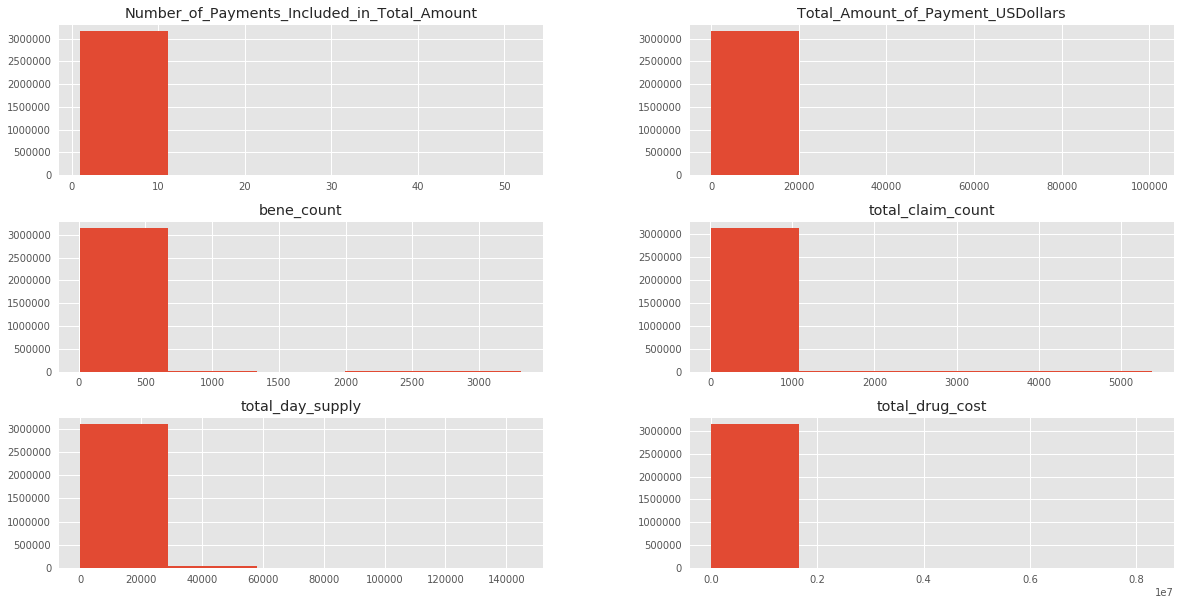

In [34]:
#plotting histogram of all numerical features
df9.hist(bins=5, figsize=(20,10))
plt.show()

Presence of skewness means that outliers are present in the variables affected as shown in the boxplots below. Outliers are not necessarily bad, but needs to be further investigating in relation to business objectives, required performance of the model and assumptions made about the dataset. Most times than not, this will need to be address if one is considering using a linear model to prevent negatively impacting outcomes of the mode

### Checking for outliers

In [35]:
df9.columns

Index(['bene_count', 'total_claim_count', 'total_day_supply',
       'total_drug_cost', 'Physician_Primary_Type',
       'Total_Amount_of_Payment_USDollars',
       'Number_of_Payments_Included_in_Total_Amount', 'state_region'],
      dtype='object')

In [36]:
df9.dtypes

bene_count                                     float64
total_claim_count                              float64
total_day_supply                               float64
total_drug_cost                                float64
Physician_Primary_Type                          object
Total_Amount_of_Payment_USDollars              float64
Number_of_Payments_Included_in_Total_Amount      int64
state_region                                    object
dtype: object

We don't need to plot the binary variables below, because we all know the expected pattern. All we need is the continuous ones as shown below

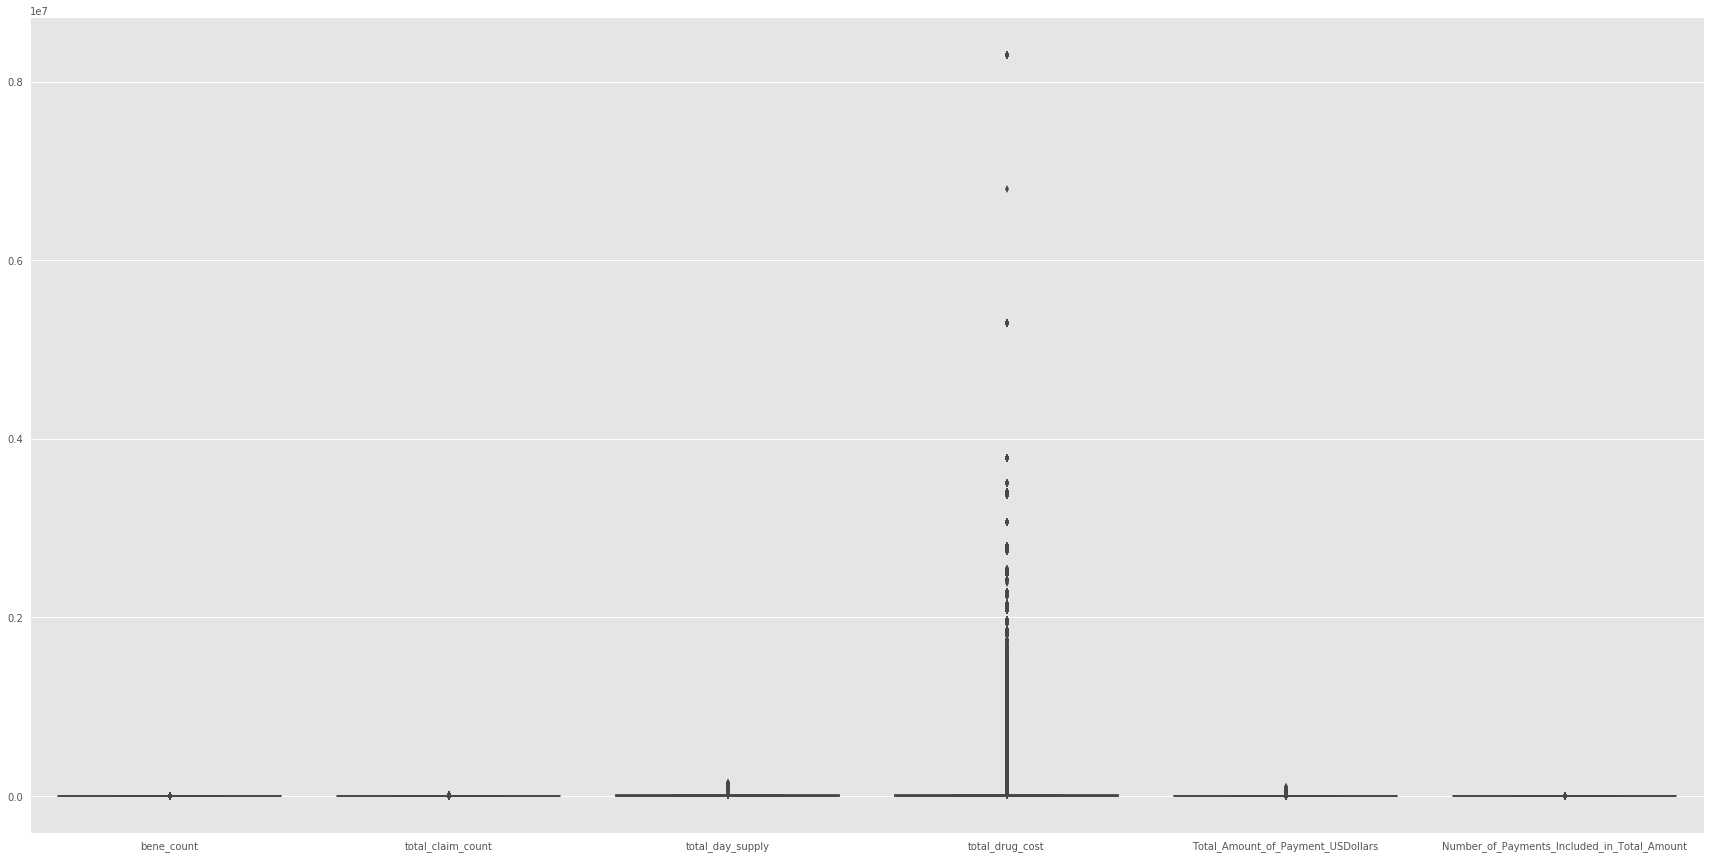

In [37]:
#boxplots for numerical variables
fig = plt.figure(figsize=(30, 15))
fig.add_subplot(1,1,1)
sns.boxplot(data= df9[['bene_count', 'total_claim_count', 'total_day_supply',
       'total_drug_cost', 'Total_Amount_of_Payment_USDollars',
       'Number_of_Payments_Included_in_Total_Amount']])

The dataset contains outliers, most notably 'Total Drug Cost.' Possible indication of fraud here that may be interesting for another data science analysis. Outliers mostly cause skewness in the distribution of variables as seen in some of the plots above. These could have been an issue if we are considering linear models like Linear or Logistic Regression models. One would need to examine these issues closely and correct for such before building the model. Outliers are not necessarily bad. It depends on business needs and how much accuracy one is trying to achieve Since I am considering non-linear models like the Random Forest, these issues are usually implicitly addressed. That is a big advantage of using such models. I decided to leave them in there to see how the model perform with an option of revisiting them if the outcome is not favorable.

In [38]:
#plotting a scatter matrix to see association with the 
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import scatter_matrix
attributes = ['bene_count', 'total_claim_count', 'total_day_supply', 'total_drug_cost', 
              'Total_Amount_of_Payment_USDollars', 'Number_of_Payments_Included_in_Total_Amount']

/home/azure052/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29eff8cf60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f29ccbadc88>]], dtype=object)

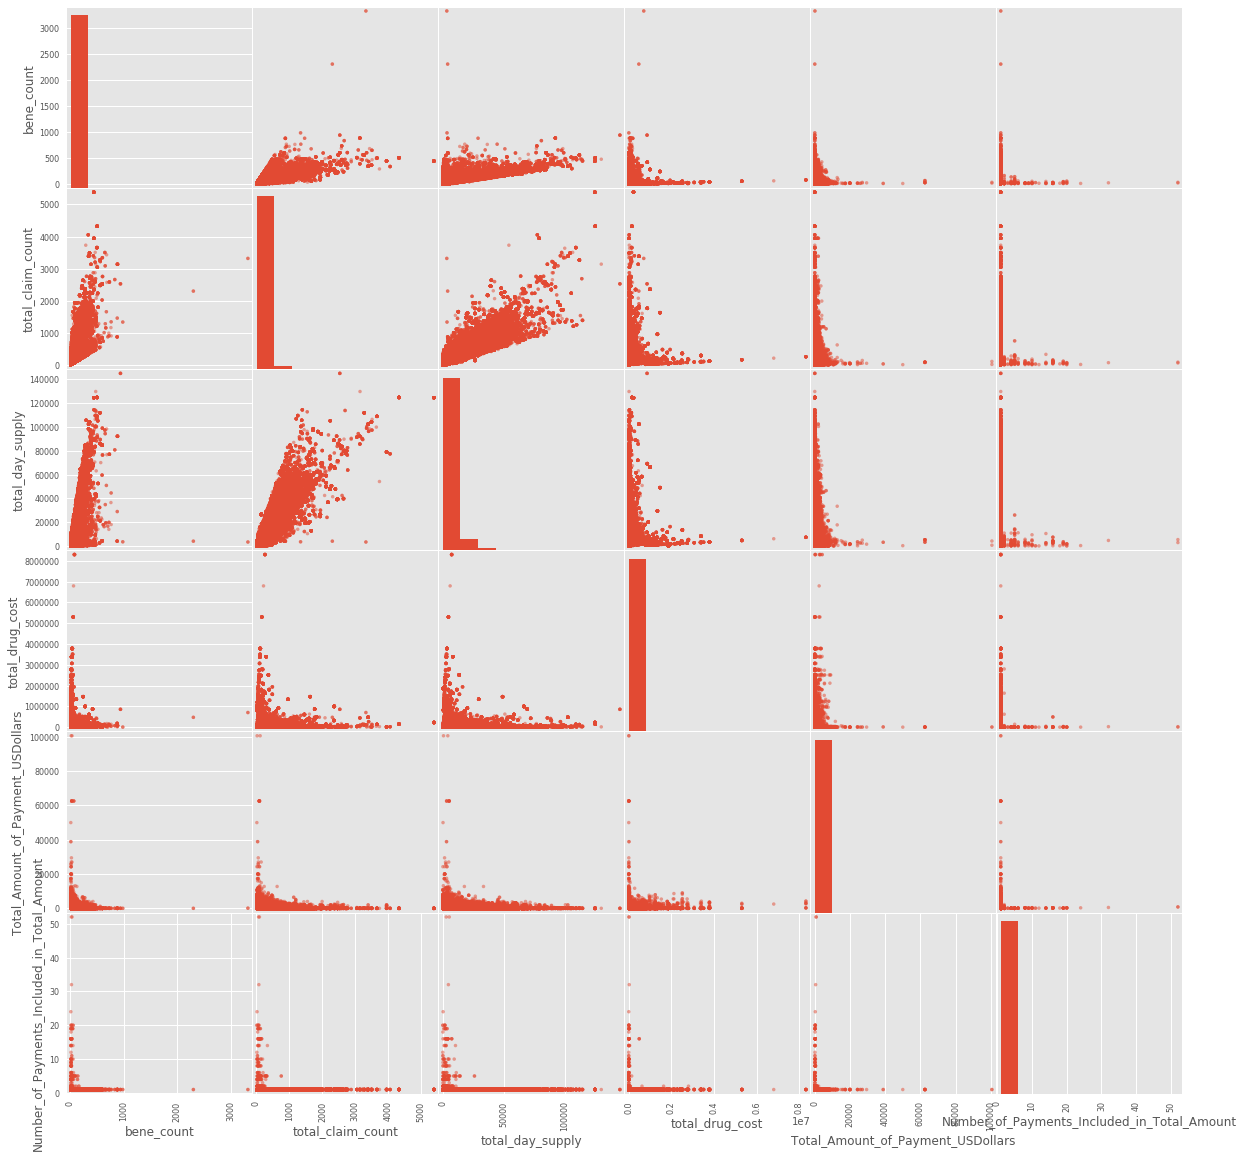

In [39]:
scatter_matrix(df9[attributes], figsize = (20, 20))

We see little or no linear association with the the target variables - Total Amount Of Payment. We however notice some possible positive association between some predictors like in the case of 'total_day_supply' and 'total_claim_count,' and 'total_day_supply' and 'bene_count.' This shows a possible multicollinearity issue that may need investigated. Let us see how our model handles that.

## Creating a Test Set

In [42]:
#here we are saying that we want the test data to be 20% of the full dataset, and the random_state is just setting a 
#random number generator's seed before creating the test set so that it always generates the same shuffled indices.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df9, test_size=0.40, random_state=42,)

In [43]:
train_set.shape, test_set.shape

((1894927, 8), (1263286, 8))

In [44]:
#we create a copy of the train data we will work with
df9_copy = train_set.copy()

### Inferential statistics on the training set data

In [45]:
#checking correlation of all features with the target variable - 'active_user'
corr_matrix = df9_copy.corr()
corr_matrix['Total_Amount_of_Payment_USDollars'].sort_values(ascending=False)

Total_Amount_of_Payment_USDollars              1.000000
total_drug_cost                                0.054535
bene_count                                     0.004019
Number_of_Payments_Included_in_Total_Amount    0.003986
total_claim_count                              0.002179
total_day_supply                               0.001903
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [94]:
#checking for multicollinearity between predictors
df9.corr()

,bene_count,total_claim_count,total_day_supply,total_drug_cost,Total_Amount_of_Payment_USDollars,Number_of_Payments_Included_in_Total_Amount
bene_count,1.000000,0.844459,0.800526,0.054129,0.003141,-0.000916
total_claim_count,0.844459,1.000000,0.901041,0.086229,0.001728,-0.001328
total_day_supply,0.800526,0.901041,1.000000,0.058175,0.000975,-0.001746
total_drug_cost,0.054129,0.086229,0.058175,1.000000,0.054242,0.001696
Total_Amount_of_Payment_USDollars,0.003141,0.001728,0.000975,0.054242,1.000000,0.003511
Number_of_Payments_Included_in_Total_Amount,-0.000916,-0.001328,-0.001746,0.001696,0.003511,1.000000


In [46]:
df10= df9_copy.reset_index(drop=True)
df10.head()

,bene_count,total_claim_count,total_day_supply,total_drug_cost,Physician_Primary_Type,Total_Amount_of_Payment_USDollars,Number_of_Payments_Included_in_Total_Amount,state_region
0,11.0,12.0,74.0,250.32,Doctor of Osteopathy,1.15,1,MW
1,21.0,110.0,5254.0,2068.94,Medical Doctor,10.67,1,S
2,53.0,182.0,14940.0,2353.62,Doctor of Osteopathy,7.19,1,MW
3,13.0,68.0,2040.0,19468.06,Medical Doctor,17.13,1,W
4,11.0,46.0,1778.0,263.79,Medical Doctor,12.14,1,S


With the knowledge that most predictors have more of a non-linear association than linear with 'Total Amount of Payment' - the target variable, from the EDA, the question we now have is: are these predictors significant enough in explaining variability in the Total Amount of Payment - the target variable?  To answer this question, one should usually fit a multivariate linear regression model to the dataset using a hypothesis test and comparing the p-values at a significant level. And, the data, most especially our predictors should meet the assumptions for such analysis. Which are usually: 

- sample must be reasonably random, 
- data must be from a normal distribution or large sample (need to check n ≥ 30), 
- the observations are independent.
- the true relationship is linear. Check that the scatter plot is roughly linear and that the residual plot has no pattern.
- the standard deviation of the response y about the true line is the same everywhere. Look at the residual plot and check that the residuals have roughly the same spread across all the x-values.
- for any fixed value of x, the response y varies normally about the true line. Check a histogram or
stemplot of the residuals.

Since we know that is not the case, and we need to transform most of the features to meet these conditions, then it's better to let go off this approach and concentrate more on non-linear predictive ones that will yeild similar results. There are industry arguments that most ensemble algorithms handle these cases well, work much better for non-linear relationships and can also reveal important predictive features for the target variables. The only downside is their black box approach with not much control over the logic of their analysis. I believe the benefits far outweighs the disadvantages, allowing one concentrate more on research and analysis of the data itself than spending unnecessary time munging data for linear conditions. 

***Separating predictors from target variables***

In [47]:
#creating predictors and target variables for the train set
X_train = train_set.copy().drop(['Total_Amount_of_Payment_USDollars'], axis=1)
y_train = train_set.copy()['Total_Amount_of_Payment_USDollars']

##creating predictors and target variables for the test set
X_test = test_set.copy().drop(['Total_Amount_of_Payment_USDollars'], axis=1)
y_test = test_set.copy()['Total_Amount_of_Payment_USDollars']

In [48]:
#shape of our train set
X_train.shape, y_train.shape

((1894927, 7), (1894927,))

In [49]:
X_train['Physician_Primary_Type'].value_counts()

Medical Doctor                  1674853
Doctor of Osteopathy             216479
Doctor of Podiatric Medicine       2044
Doctor of Optometry                1328
Doctor of Dentistry                 186
Chiropractor                         37
Name: Physician_Primary_Type, dtype: int64

In [50]:
#shape of the test set
X_test.shape, y_test.shape

((1263286, 7), (1263286,))

In [51]:
X_test['Physician_Primary_Type'].value_counts()

Medical Doctor                  1116877
Doctor of Osteopathy             143995
Doctor of Podiatric Medicine       1399
Doctor of Optometry                 876
Doctor of Dentistry                 124
Chiropractor                         15
Name: Physician_Primary_Type, dtype: int64

In [52]:
#first 5 rows of test set
X_test.head()

,bene_count,total_claim_count,total_day_supply,total_drug_cost,Physician_Primary_Type,Number_of_Payments_Included_in_Total_Amount,state_region
2531536,45.0,243.0,14730.0,1802.83,Medical Doctor,1,MW
1952704,38.0,388.0,11356.0,27345.38,Medical Doctor,1,NE
47810,15.0,43.0,1710.0,1438.20,Medical Doctor,1,S
67286,43.0,199.0,5094.0,1210.84,Medical Doctor,1,W
523193,27.0,159.0,7869.0,877.90,Medical Doctor,1,W


In [53]:
#first 5 rows of the train set
X_train.head()

,bene_count,total_claim_count,total_day_supply,total_drug_cost,Physician_Primary_Type,Number_of_Payments_Included_in_Total_Amount,state_region
3122922,11.0,12.0,74.0,250.32,Doctor of Osteopathy,1,MW
2933626,21.0,110.0,5254.0,2068.94,Medical Doctor,1,S
465910,53.0,182.0,14940.0,2353.62,Doctor of Osteopathy,1,MW
702753,13.0,68.0,2040.0,19468.06,Medical Doctor,1,W
2231857,11.0,46.0,1778.0,263.79,Medical Doctor,1,S


In [54]:
#checking the data types of features in the train set
X_train.dtypes

bene_count                                     float64
total_claim_count                              float64
total_day_supply                               float64
total_drug_cost                                float64
Physician_Primary_Type                          object
Number_of_Payments_Included_in_Total_Amount      int64
state_region                                    object
dtype: object

In [55]:
#separating the features into categorical and numerical variables in preparation for pipelining
cat_attribs = ['state_region', 'Physician_Primary_Type',]
num_attribs = list(X_train.drop(cat_attribs, axis=1))
#num_attribs = X_train.columns


In [56]:
num_attribs_col = X_train.columns

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

#this class was used to impute missing values
class DataFrameSelector(TransformerMixin):
    def __init__(self, attribute_names):        
        self.attribute_names = attribute_names
    def fit(self, X, y=None):      
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [58]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# This class is no available yet, but will be in Scikit-Learn 2.0.
#Thanks to Aurelien Geron for the info in his Hands-On Machine Learning with Scikit_Learn & TensorFlow book and blog

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [59]:
# importing necessary transformation modules 
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import CategoricalEncoder # coming in Scikit-Learn 2.0
#from sklearn.preprocessing import Imputer

#setting up the pipeline for numerical variables
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)), ('std_scaler', StandardScaler()),])
#('imputer', Imputer(strategy="median")),
                        

#setting up the pipeline for categorical variables
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)), 
                         ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),])

#combining both numerical and categorical pipelines
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline", num_pipeline),
                                                 ("cat_pipeline", cat_pipeline),])

In [60]:
#fitting the full pipeline to the training set
train_set_tr = full_pipeline.fit_transform(X_train)
train_set_tr

array([[-0.66888857, -0.74431656, -0.78120054, ...,  1.        ,
         0.        ,  0.        ],
       [-0.35261435, -0.09921623, -0.01082106, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65946317,  0.37473503,  1.42969932, ...,  1.        ,
         0.        ,  0.        ],
       ..., 
       [-0.51075146, -0.69165531, -0.75948714, ...,  0.        ,
         0.        ,  1.        ],
       [-0.22610466, -0.48759296, -0.6485406 , ...,  0.        ,
         0.        ,  1.        ],
       [ 4.77102811,  3.06045885,  3.97284392, ...,  0.        ,
         0.        ,  1.        ]])

In [61]:
#shape of transformed trained set
train_set_tr.shape

(1894927, 16)

In [62]:
#fitting the full pipeline to the test set
test_set_tr = full_pipeline.fit_transform(X_test)
test_set_tr

array([[ 0.4040077 ,  0.77604765,  1.39621663, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.18349305,  1.72997988,  0.89514158, ...,  0.        ,
         0.        ,  1.        ],
       [-0.54105506, -0.53972095, -0.53739249, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [-0.57255716, -0.3489345 , -0.53650143, ...,  0.        ,
         0.        ,  1.        ],
       [-0.0055195 , -0.0726231 ,  0.13996474, ...,  0.        ,
         0.        ,  1.        ],
       [-0.57255716, -0.50024789, -0.26116262, ...,  0.        ,
         0.        ,  1.        ]])

In [63]:
#shape of transformed test set
test_set_tr.shape

(1263286, 16)

### Building and selecting the machine learning model

We are using the mean square error (MSE) to measure the accuracy amongst models. The MSE of an estimator measures the average of the squares of the errors or deviations- that is, the difference between the estimator and what is being estimated. So, a lower value is better.

In [64]:
#importing, instantiating and fitting the GBT
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()
gbt.fit(train_set_tr, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [65]:
#computing the MSE
from sklearn.metrics import mean_squared_error
gbt_pay_pred = gbt.predict(train_set_tr)
gbt_mse = mean_squared_error(y_train, gbt_pay_pred)
gbt_rmse = np.sqrt(gbt_mse)
gbt_rmse

292.37774728399791

In [66]:
#importing, instantiating and fitting the RF
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_set_tr, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [67]:
#computing the MSE
rf_pay_pred = rf.predict(train_set_tr)
rf_mse = mean_squared_error(y_train, rf_pay_pred)
rf_rmse = np.sqrt(gbt_mse)
rf_rmse

292.37774728399791

In [68]:
#importing, instantiating and fitting the LR
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_set_tr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
#computing the MSE
lr_pay_pred = rf.predict(train_set_tr)
lr_mse = mean_squared_error(y_train, lr_pay_pred)
lr_rmse = np.sqrt(gbt_mse)
lr_rmse

292.37774728399791

The results above could be questionable because we got same result for all three regressors. So, let us cross-validate to ensure
we are not overfitting the training dataset.

### Model Evaluation using Cross-Validation

The Scikit-Learn cross-validation features was used here, which expects a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is opposite of the MSE (i.e., a negative value), which is why i computed the negative of the scores (-scores) before calculating the square root.

In [70]:
#cross-validating the RF with it's MSE
from sklearn.model_selection import cross_val_score
gbt_scores = cross_val_score(gbt, train_set_tr, y_train, scoring="neg_mean_squared_error", cv=10)
gbt_rmse_scores = np.sqrt(-gbt_scores)

In [71]:
#function used to display 10 cross-validated scores, their mean and std 
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [72]:
display_scores(gbt_rmse_scores)

Scores: [ 248.39903957  299.75515144  281.0365137   261.87979577  306.12932282
  261.86380583  263.30274569  277.40075288  399.2773004   298.18660304]
Mean: 289.723103114
Standard deviation: 40.7773955615


In [73]:
#cross-validating the RF with it's MSE
rf_scores = cross_val_score(rf, train_set_tr, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)

In [74]:
display_scores(rf_rmse_scores)

Scores: [ 239.48734185  266.07438753  303.76806139  246.44890497  264.15561655
  251.71213312  250.93928676  268.63931673  348.70225095  282.97635827]
Mean: 272.290365811
Standard deviation: 31.1209035077


In [75]:
#cross-validating the LR with it's MSE
lr_scores = cross_val_score(lr, train_set_tr, y_train, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)

In [76]:
display_scores(lr_rmse_scores)

Scores: [ 249.08102223  300.27499344  281.46366817  262.39051811  306.65761292
  262.42014559  263.89530661  277.98325458  399.73719404  298.69524003]
Mean: 290.259895572
Standard deviation: 40.738502434


The results above shows the Random Forest algorithm is the winner, outperforming the other two with lower values and tighter spread. So, we are going with that.

### Fine tuning the best model

Here i am using GridSearchCV to search for the most important hyperparameters for the selected model that had lowest MSE score, which in our case is Random Foest.  

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = [{'n_estimators':[5, 10, 15], 'max_features': [2,4,6,8]}, 
             {'bootstrap': [False], 'n_estimators': [5, 10], 'max_features': [2,3,4]}]

In [79]:
rf = RandomForestRegressor()

In [80]:
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

In [81]:
grid_search.fit(train_set_tr, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [5, 10, 15], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [5, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [82]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

278.769638844 {'max_features': 2, 'n_estimators': 5}
279.186316919 {'max_features': 2, 'n_estimators': 10}
276.833459052 {'max_features': 2, 'n_estimators': 15}
281.606370243 {'max_features': 4, 'n_estimators': 5}
277.138465447 {'max_features': 4, 'n_estimators': 10}
277.022934077 {'max_features': 4, 'n_estimators': 15}
278.717504472 {'max_features': 6, 'n_estimators': 5}
278.337406962 {'max_features': 6, 'n_estimators': 10}
279.857463115 {'max_features': 6, 'n_estimators': 15}
279.764319378 {'max_features': 8, 'n_estimators': 5}
276.769228955 {'max_features': 8, 'n_estimators': 10}
278.366121876 {'max_features': 8, 'n_estimators': 15}
286.80270496 {'bootstrap': False, 'max_features': 2, 'n_estimators': 5}
284.92148517 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
285.263632164 {'bootstrap': False, 'max_features': 3, 'n_estimators': 5}
284.908247405 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
286.235926558 {'bootstrap': False, 'max_features': 4, 'n_estimat

In [83]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 10}

*** Analyzing the best model and its errors***

In [147]:
features_importances = grid_search.best_estimator_.feature_importances_

In [148]:
features_importances

array([  1.14639225e-01,   1.70505750e-01,   2.88717811e-01,
         3.91498404e-01,   1.54656772e-04,   7.24136945e-03,
         7.73976818e-03,   1.56738294e-03,   2.94574550e-03,
         1.31535195e-02,   5.16998097e-08,   1.32489688e-04,
         1.47113495e-04,   6.01644406e-04,   1.12845330e-04,
         8.42223771e-04])

Let's display these importance scores next to their corresponding attributes

In [149]:
cat_encoder = cat_pipeline.named_steps['cat_encoder']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs

In [174]:
sorted(zip(features_importances, attributes), reverse=True)

[(0.39149840381059342, 'total_drug_cost'),
 (0.28871781108074251, 'total_day_supply'),
 (0.17050574957727693, 'total_claim_count'),
 (0.11463922485071887, 'bene_count'),
 (0.013153519455514646, 'W'),
 (0.007739768175049247, 'NE'),
 (0.007241369450545816, 'MW'),
 (0.0029457455014294904, 'S'),
 (0.0015673829352763548, 'O'),
 (0.00015465677240344316, 'Number_of_Payments_Included_in_Total_Amount')]

In [175]:
feature_imprt_list=[]
features_list = []
for feature_imprt, feature in sorted(zip(features_importances, attributes), reverse=True):
    feature_imprt_list.append(feature_imprt)
    features_list.append(feature)
    

In [183]:
feature_df = pd.DataFrame({'feature_name': features_list,'feature_imprt': feature_imprt_list})
#feature_df

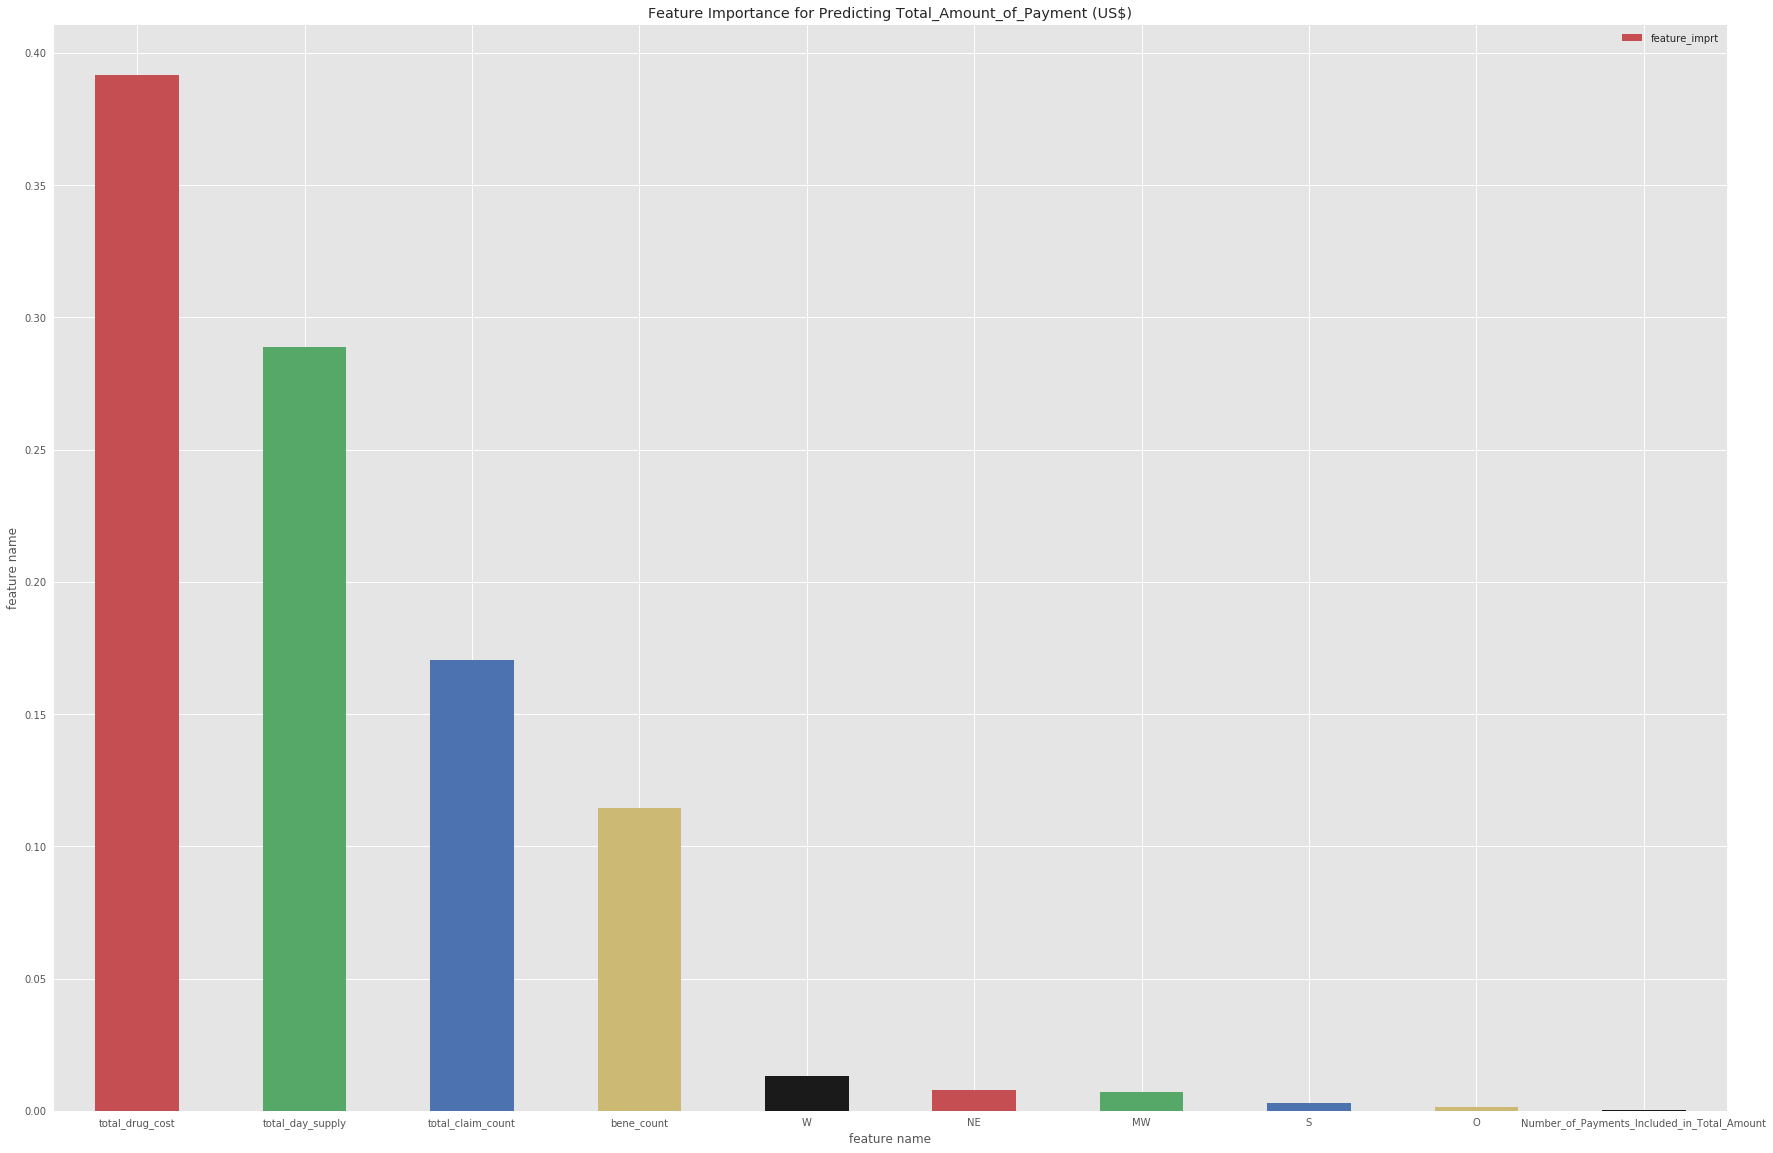

In [182]:
ax = feature_df.plot(x='feature_name', y='feature_imprt', kind='bar', figsize=(30, 20), color='rgbyk', 
                     title= 'Feature Importance for Predicting Total_Amount_of_Payment (US$)', rot=0)
ax.set_xlabel("feature name")
ax.set_ylabel("feature name")
plt.show()

***Evaluating the system on the Test Set***

In [88]:
final_model = grid_search.best_estimator_

In [89]:
#already defined. make a copy of the y_test
##creating predictors and target variables for the test set
#X_test = test_set.copy().drop(['Total_Amount_of_Payment_USDollars'], axis=1)
y_test = test_set.copy()['Total_Amount_of_Payment_USDollars']
y_test.copy = y_test.copy()

In [90]:
X_test_prepared = full_pipeline.transform(X_test)

In [91]:
final_predictions = final_model.predict(X_test_prepared)

In [92]:
final_mse = mean_squared_error(y_test.copy, final_predictions)

In [95]:
final_rmse = np.sqrt(final_mse)
final_rmse

288.54349617262477